# Life Expectancy and GDP

## 1. Introduction
This project explores and analyzes data on GDP and life expectancy from the **World Health Organization** and the **World Bank** to try and identify the relationship between the GDP and life expectancy of six different countries in the period of 2000 to 2015.

## 2. Data loading

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## 3. Data cleaning & inspection

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [20]:
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [21]:
df.groupby('Country')[['Life expectancy at birth (years)', 'GDP']].describe()

Life expectancy at birth (years)                      \
                                                    count      mean       std   
Country                                                                         
Chile                                                16.0  78.94375  1.058911   
China                                                16.0  74.26250  1.318016   
Germany                                              16.0  79.65625  0.975000   
Mexico                                               16.0  75.71875  0.620987   
United States of America                             16.0  78.06250  0.832566   
Zimbabwe                                             16.0  50.09375  5.940311   

                                                              GDP  \
                           min     25%    50%     75%   max count   
Country                                                             
Chile                     77.3  77.975  79.00  79.825  80.5  16.0   
China                     71.7  73.400  74.45  75.250  76.1  16.0   
Germany                   78.0  78.950  79.85  80.525  81.0  16.0   
Mexico                    74.8  75.225  75.65  76.150  76.7  16.0   
United States of America  76.8  77.425  78.15  78.725  79.3  16.0   
Zimbabwe                  44.3  45.175  47.40  55.325  60.7  16.0   

                                                                    \
                                  mean           std           min   
Country                                                              
Chile                     1.697888e+11  7.687884e+10  6.973681e+10   
China                     4.957714e+12  3.501096e+12  1.211350e+12   
Germany                   3.094776e+12  6.674862e+11  1.949950e+12   
Mexico                    9.766506e+11  2.095716e+11  6.836480e+11   
United States of America  1.407500e+13  2.432694e+12  1.030000e+13   
Zimbabwe                  9.062580e+09  4.298310e+09  4.415703e+09   

                                                                    \
                                   25%           50%           75%   
Country                                                              
Chile                     9.387303e+10  1.729975e+11  2.449515e+11   
China                     1.881585e+12  4.075195e+12  7.819550e+12   
Germany                   2.740870e+12  3.396350e+12  3.596078e+12   
Mexico                    7.630910e+11  1.004376e+12  1.156992e+12   
United States of America  1.210000e+13  1.445000e+13  1.567500e+13   
Zimbabwe                  5.748309e+09  6.733671e+09  1.263446e+10   

                                        
                                   max  
Country                                 
Chile                     2.783840e+11  
China                     1.106470e+13  
Germany                   3.890610e+12  
Mexico                    1.298460e+12  
United States of America  1.810000e+13  
Zimbabwe                  1.630467e+10

In [22]:
df.isna().sum()

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64

In [23]:
df.nunique()

Country                              6
Year                                16
Life expectancy at birth (years)    69
GDP                                 96
dtype: int64

In [24]:
print(df['Country'].unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


**Observations:** There is no missing data for any of the variables and we know that the countries we are looking into are Chile, China, Germany, Mexico, USA and Zimbabwe.
* Zimbabwe is an outlier. Lowest average life expectancy (~50 years) with very high variability (std ≈ 6). It has by far the lowest GDP levels, much below other countries. Its unusually volatile life expectancy despite minimal GDP growth highlights how non-economic factors can strongly influence population health outcomes.
* Germany has the highest life expectancy. Mean ≈ 79.7 years, tightly clustered (low std ≈ 1). It stands out for combining high, stable life expectancy with a large but steady GDP, suggesting that economic stability and established social systems sustain long-term health outcomes.
* United States has the highest GDP overall. Average GDP ≈ 14 trillion, far more than all other countries. Life expectancy is comparatively high but not the highest, lagging behind Germany and Chile. These results suggest that high national GDP alone does not guarantee the highest life expectancy and may indicate uneven access to health outcomes across populations.
* China shows the strongest growth trajectory. Large gap between minimum and maximum GDP values
(~1.2T to 11T), indicating exceptional economic expansion over this period of time. Life expectancy increased steadily without a big gap as seen with the GDP.
* Chile and Mexico follow similar patterns. Moderate GDP growth and gradually improving life expectancy. Chile performs slightly better than Mexico in life expectancy despite having significantly lower GDP.

## 4. Exploratory visualization (scatterplot and violin plot)

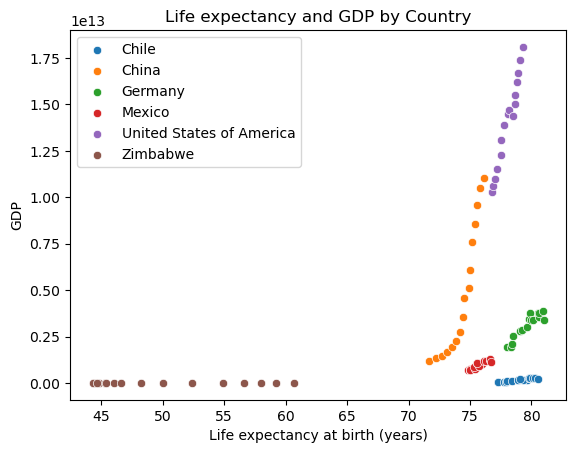

<Figure size 640x480 with 0 Axes>

In [25]:
for i in df['Country'].unique():
    sns.scatterplot(
       data=df[df['Country'] == i],
       x='Life expectancy at birth (years)',
       y='GDP',
       label=i
    )
plt.title('Life expectancy and GDP by Country')
plt.show()
plt.clf()

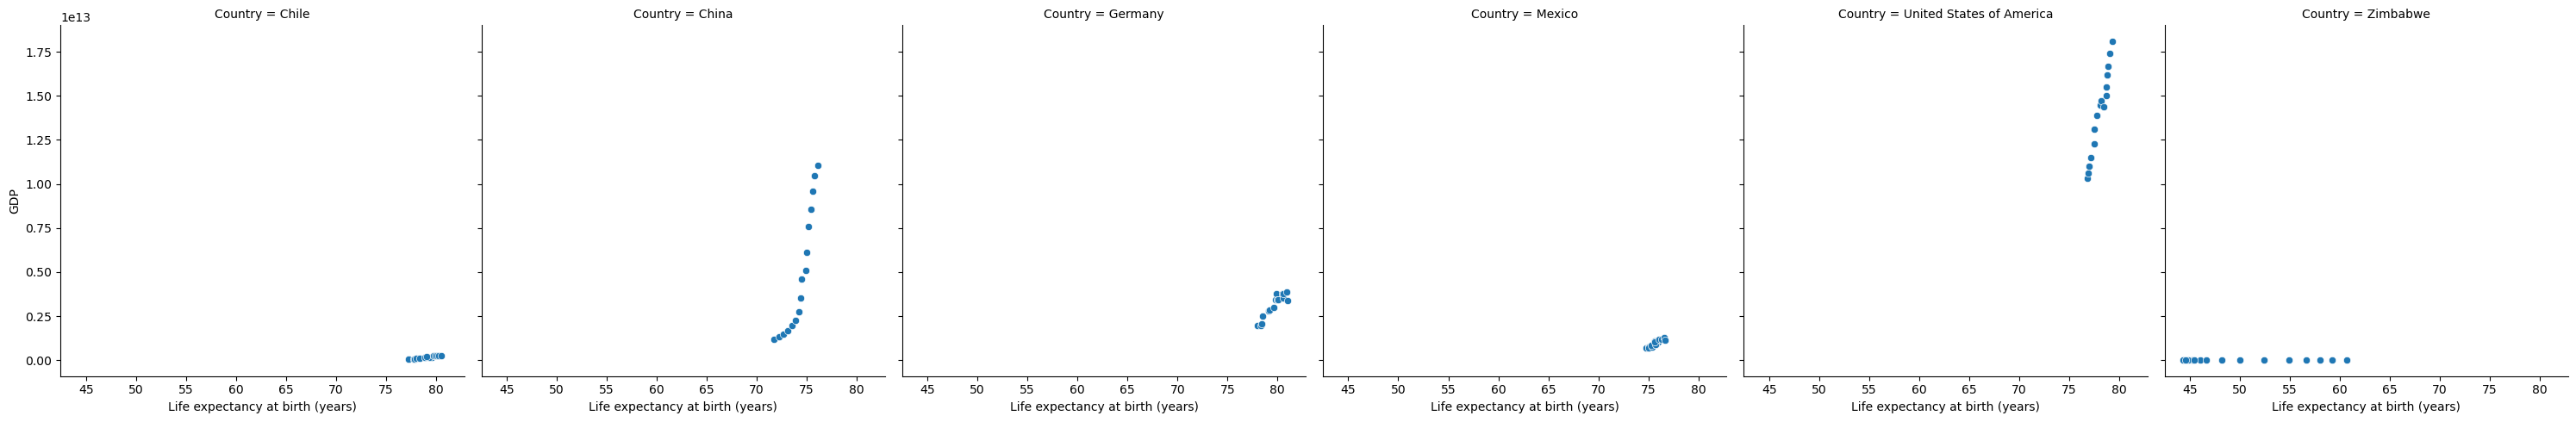

In [26]:
sns.relplot(
    data=df,
    x='Life expectancy at birth (years)',
    y='GDP',
    col='Country',
    kind='scatter'
)

**Observations:** The scatterplot visualizes how, across all countries, higher life expectancy is visibly associated with higher GDP, but the relationship is very different between countries. Within each country, the GDP increases steadily as life expectancy increases, forming tight upward trends.
* The United States and China show the steepest GDP growth over time, with China displaying particularly rapid increases despite smaller gains in life expectancy.
* Germany follows a stable upward pattern with moderate GDP growth.
* Chile and Mexico show slower GDP growth with smaller life-expectancy gains.
* Zimbabwe stands out as an outlier, remaining at much lower GDP and life expectancy levels compared to all other countries.

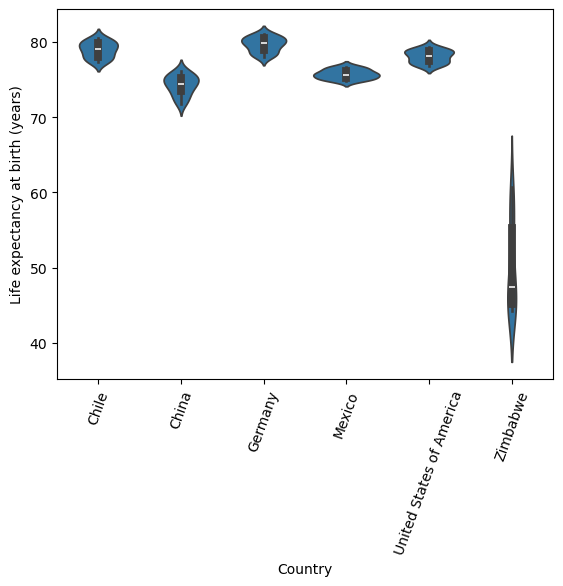

In [48]:
sns.violinplot(data=df, x='Country', y='Life expectancy at birth (years)')
plt.xticks(rotation=70)
plt.title('')
plt.show()

**Observations:** The violin plot shows clear differences in both average life expectancy and variability between countries.
* Zimbabwe stands out as an extreme outlier, with a much lower and wider distribution, indicating high volatility and consistently poorer life expectancy.
* Germany, Chile, and the United States display narrow, high-centered distributions, reflecting stable and consistently high life expectancy.
* China and Mexico fall in between, showing moderate variability and gradually increasing life expectancy over time.

## 5. Correlation analysis

In [27]:
df[['Life expectancy at birth (years)', 'GDP']].corr()

,Life expectancy at birth (years),GDP
Life expectancy at birth (years),1.000000,0.343207
GDP,0.343207,1.000000


In [28]:
df.groupby('Country')[['Life expectancy at birth (years)', 'GDP']].corr()

Life expectancy at birth (years)  \
Country                                                                                       
Chile                    Life expectancy at birth (years)                          1.000000   
                         GDP                                                       0.949877   
China                    Life expectancy at birth (years)                          1.000000   
                         GDP                                                       0.908526   
Germany                  Life expectancy at birth (years)                          1.000000   
                         GDP                                                       0.932699   
Mexico                   Life expectancy at birth (years)                          1.000000   
                         GDP                                                       0.932238   
United States of America Life expectancy at birth (years)                          1.000000   
                         GDP                                                       0.981709   
Zimbabwe                 Life expectancy at birth (years)                          1.000000   
                         GDP                                                       0.966200   

                                                                GDP  
Country                                                              
Chile                    Life expectancy at birth (years)  0.949877  
                         GDP                               1.000000  
China                    Life expectancy at birth (years)  0.908526  
                         GDP                               1.000000  
Germany                  Life expectancy at birth (years)  0.932699  
                         GDP                               1.000000  
Mexico                   Life expectancy at birth (years)  0.932238  
                         GDP                               1.000000  
United States of America Life expectancy at birth (years)  0.981709  
                         GDP                               1.000000  
Zimbabwe                 Life expectancy at birth (years)  0.966200  
                         GDP                               1.000000

In [29]:
stats.pearsonr(df['GDP'], df['Life expectancy at birth (years)'])

PearsonRResult(statistic=np.float64(0.343206748449156), pvalue=np.float64(0.0006187129569469888))

**Observations:** In the previous step, looking at the scatterplot, we saw how aggregated global patterns hide strong country-level relationships between economic growth and health outcomes.
* Very weak correlation between life expectancy and GDP when aggreated (0.34). Within each country, the GDP and life expectancy move together, but globally the relationship weakens.
* Very strong correlation between life expectancy and GDP within each country (0.90-0.98).

The Pearson correlation analysis shows a weak positive global relationship between GDP and life expectancy (r = 0.34, p < 0.001), indicating a statistical significance despite a modest effect size.

## 6. Standarized comparison
GDP values are standardized for each country using z-score normalization to compare the relative growth trends across economies of very different sizes.

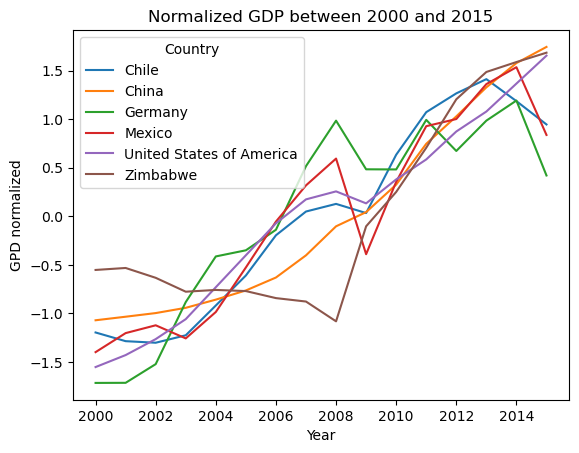

In [43]:
df['GDP_norm'] = df.groupby('Country')['GDP'].transform(
    lambda x: (x - x.mean()) / x.std()
)

sns.lineplot(data=df, x='Year', y='GDP_norm', hue='Country')
plt.title('Normalized GDP between 2000 and 2015')
plt.xlabel('Year')
plt.ylabel('GPD normalized')
plt.show()

**Observations:** Normalized GDP reveals relative growth dynamics that raw GDP hides. We see that China is the country growing stronger and Zimbabwe as the most volatile economy over the period. All countries show upward normalized GDP trends from 2000–2015, indicating economic growth relative to their own histo-economical baselines.
* China shows the strongest and most consistent growth.
* The United States shows steady, stable improvement without large fluctuations.
* Chile and Mexico follow similar growth paths, with smooth increases after ~2009.
* Germany has volatility during hte first years, peaking around ~2008 before stabilizing and growing more modestly afterward, with some up and downward trends.
* Zimbabwe shows high volatility, including a sharp dip around ~2008 followed by a steep rebound, suggesting significant economic instability compared to the other countries.

## Conclusion
* This analysis shows that, while GDP and life expectancy seem weakly correlated at a global level, strong positive relationships emerge when looking into individual countries. 
* Normalizing GDP revealed important differences in relative economic growth dynamics, with China showing the strongest sustained growth, the United States showing a steady stability, and Zimbabwe exhibiting high volatility and vulnerability.
* Overall, the findings highlight how aggregated statistics can obscure important country-level trends, emphasizing the value of segmented analysis when interpreting socioeconomic data.